In [190]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from ipywidgets import interactive, interact
from wordcloud import wordcloud
from IPython.display import display, clear_output
import os
import numpy as np
%matplotlib inline

In [45]:
title = "Data Scientist"
DATA_PATH = r"C:\Users\Colin\Documents\Analytics 903\Job_Scraper"
file_names = [name for name in os.listdir(DATA_PATH) if name.endswith('.csv')]

In [44]:
file_names

['Data_Scientist_Atlanta_GA_Job_Report.csv',
 'Data_Scientist_Boston_MA_Job_Report.csv',
 'Data_Scientist_Chicago_IL_Job_Report.csv',
 'Data_Scientist_Dallas_TX_Job_Report.csv',
 'Data_Scientist_Orlando_FL_Job_Report.csv',
 'Data_Scientist_Raleigh_NC_Job_Report.csv',
 'Data_Scientist_San_Francisco_CA_Job_Report.csv',
 'Data_Scientist_Seattle_WA_Job_Report.csv']

In [51]:
stop_words = ["Job", "Report.csv"] + title.split()

In [52]:
def extract_city(file_name):
    split_name = file_name.split("_")
    return " ".join([name for name in split_name if name not in stop_words])

In [53]:
city_names = [extract_city(name) for name in file_names]

In [54]:
city_names

['Atlanta GA',
 'Boston MA',
 'Chicago IL',
 'Dallas TX',
 'Orlando FL',
 'Raleigh NC',
 'San Francisco CA',
 'Seattle WA']

In [55]:
dict_df = {name:pd.read_csv(file) for name, file in zip(city_names, file_names)}

In [73]:
for key, value in dict_df.items():
    print("City: {} Has length: {}".format(key, len(value)))

City: Dallas TX Has length: 97
City: Boston MA Has length: 99
City: Seattle WA Has length: 97
City: Atlanta GA Has length: 99
City: San Francisco CA Has length: 98
City: Raleigh NC Has length: 99
City: Orlando FL Has length: 61
City: Chicago IL Has length: 99


In [62]:
print("Key: ", list(dict_df.keys())[0])
print("DataFrame head: ")
list(dict_df.values())[0].head()

Key:  Dallas TX
DataFrame head: 


,Job_Title,Company,Location,Date_Posted,Link,Text,Python,R,SAS,Hadoop,...,Consulting,D3,Hive,Pig,MySQL,ggplot,Scala,C,Bash,Neural Nets
0,Data Scientist - ITC,Ind-US Target LLC,"Dallas, TX 75201 (City Center District area)",6 days ago,https://www.indeed.com/rc/clk?jk=844f47d42e4b9...,guest\r\n {text}\r\n {text}\r\ndata scientist ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist Intern,Hotels.com,"Dallas, TX 75240 (Far North area)",4 days ago,https://www.indeed.com/rc/clk?jk=cee5efa96f591...,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Senior Data Scientist,Sabre,"Dallas-Fort Worth, TX",18 days ago,https://www.indeed.com/rc/clk?jk=a97ecf0a533d3...,home\r\n >> \r\ncareers\r\n\r\n\r\n\r\n\r\n\r\...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Data Scientist (EPIC Social Media Analytics Co...,Thousand Hills Holdings LLC,"Frisco, TX 75033",2 days ago,https://www.indeed.com/company/Thousand-Hills-...,seeking a data scientist to own the scoring pl...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,CBRE,"Dallas, TX",9 days ago,https://www.indeed.com/rc/clk?jk=eb9c0c4c86198...,settings\r\ndescription / opportunity\r\nthe r...,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


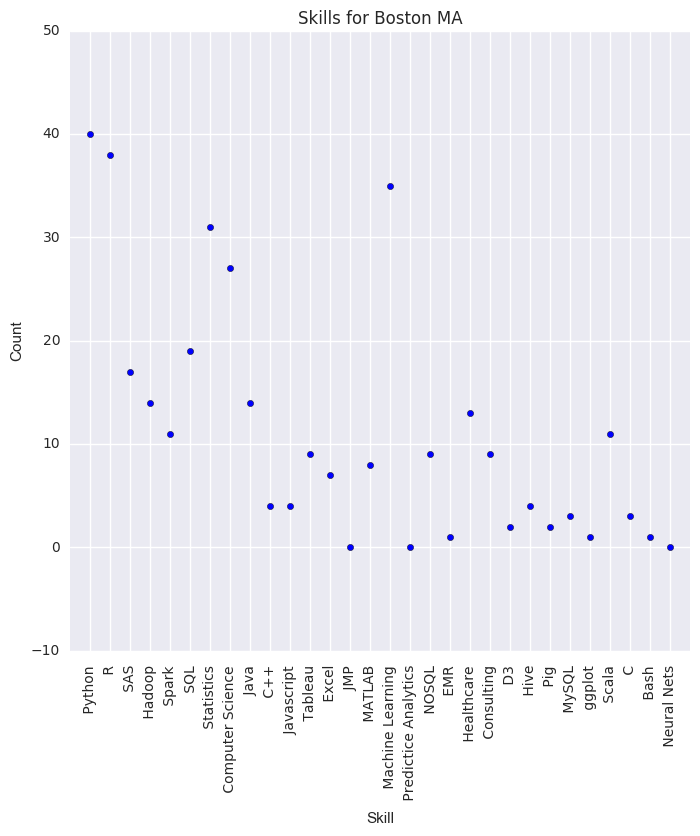

In [204]:
city_list = city_names + ["All"]
@interact
def plot_job_skills(city=city_list):
    
    plt.figure(figsize=(8,8))
    patches = []
    
    if city == "All":
        for color, df, name in zip(sns.color_palette("hls", 8), dict_df.values(), dict_df.keys()):
            for i, column in enumerate(df.columns[6:]):
                plt.scatter(i, sum(df[column] > 0), color=color)
            plt.xticks(range(len(df.columns[6:])), df.columns[6:], rotation=90);

            patch = mpatches.Patch(color=color, label=name)
            patches.append(patch)
            plt.xlim([-1, len(df.columns[6:])])
        plt.ylim(ymin=0)
        plt.legend(handles=patches)
        plt.title("Skills Across Cities")
    else:
        df = dict_df[city]
        for i, column in enumerate(df.columns[6:]):
            plt.scatter(i, sum(df[column] > 0))
        plt.xlim([-1, len(df.columns[6:])])
        plt.xticks(range(len(df.columns[6:])), df.columns[6:], rotation=90);
        plt.title("Skills for {}".format(city))
    plt.xlabel("Skill")
    plt.ylabel("Count")

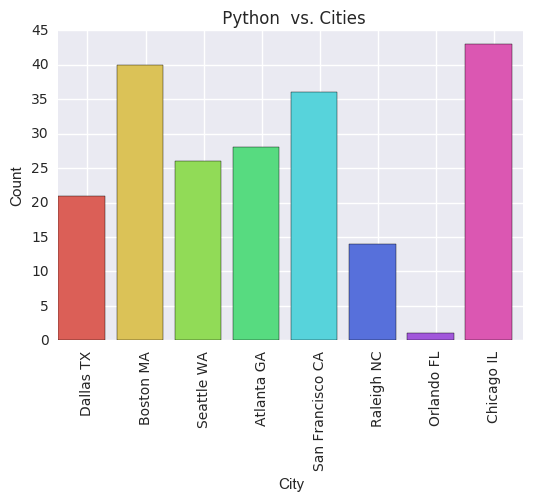

In [198]:
skill_list = list(list(dict_df.values())[0].columns[6:])
@interact
def plot_skill_by_city(skill=skill_list):
    
    height = [sum(df[skill] > 0) for df in dict_df.values()]
    plt.bar(np.arange(0, len(dict_df.keys())), height, color=sns.color_palette("hls", 8))
    plt.xticks(np.arange(.5, len(dict_df.keys()), 1), dict_df.keys(), rotation=90)
    plt.title("{} vs. Cities".format(skill))
    plt.xlabel("City")
    plt.ylabel("Count")
    
    

In [180]:
company_list = ['Company1']
job_list = ['Job1']


def get_text(text, term):
    
    relevant_text = []
    for line in text.split('\n'):
        if term.lower() in line:
            relevant_text.append(line)
    return relevant_text


company_dropdown = interactive(None, company=company_list)
job_dropdown = interactive(None, company=job_list)

        
@interact
def get_wordcloud(city_name=city_names, skill=skill_list):
    
    global company_dropdown, job_dropdown
    
    company_df = dict_df[city_name][dict_df[city_name][skill] > 0]
    company_list = company_df.Company.tolist()
    
    def get_companies(company):
        global job_dropdown
        
        print(city_name, skill, company)
        city_df = company_df.copy()#dict_df[city_name]
        df = city_df[city_df.Company == company]
        job_list = df.Job_Title.tolist()
        
        def get_jobs(Job_Title):
            
            text = get_text(df[df.Job_Title == Job_Title].iloc[0].Text, skill)
            print("Line(S) in Job Description Containing{}:\n\n{}".format(skill, '\n\n'.join(text)))
        
        job_dropdown.close()
        job_dropdown = interactive(get_jobs, Job_Title=job_list)
        display(job_dropdown)
    
    company_dropdown.close()
    company_dropdown = interactive(get_companies, company=company_list)
    display(company_dropdown)

Line(S) in Job Description Containing Machine Learning :

do you ever daydream about a job that allows you to exercise your creativity and data science expertise by building a bunch of cool projects  datarobot labs (a research group within datarobot) is hiring a data scientist to showcase the capabilities of our machine learning platform 

end-to-end experience building and deploying machine learning applications
